In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import os



C:\Users\anton_s0\AppData\Local\Temp\ipykernel_14180\3839918279.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
happiness = pd.read_csv(str(os.getcwd())+"\WHR2023.csv")
alcohol = pd.read_csv(str(os.getcwd())+"\drinks per capita.csv")


In [3]:
industry_contrys = []
development_contrys = []
with open(str(os.getcwd())+"/industri_länder.txt", "r") as file:
    for row in file:
        row.strip("\n")
        industry_contrys.append(row)

for i in range(len(industry_contrys)):
    industry_contrys[i] = industry_contrys[i].strip("\n")

with open(str(os.getcwd())+"/utvecklings_länder.txt", "r") as file:
    for row in file:
        development_contrys.append(row)

for i in range(len(development_contrys)):
    development_contrys[i] = development_contrys[i].strip("\n")


print(industry_contrys)
print(development_contrys)

['Norway', 'Australia', 'Switzerland', 'Germany', 'Denmark', 'Singapore', 'Netherlands', 'Ireland', 'Iceland', 'Canada', 'USA', 'Hong Kong', 'New Zealand', 'Sweden', 'Liechtenstein', 'United Kingdom', 'Japan', 'South Korea', 'Israel', 'Luxembourg', 'France', 'Belgium', 'Finland', 'Austria', 'Slovenia', 'Italy', 'Spain', 'Czech Republic', 'Greece', 'Brunei', 'Estonia', 'Andorra', 'Cyprus', 'Malta', 'Qatar', 'Poland', 'Lithuania', 'Chile', 'Saudi Arabia', 'Slovakia', 'Portugal', 'United Arab Emirates', 'Hungary', 'Latvia', 'Argentina', 'Croatia', 'Bahrain', 'Montenegro', 'Russia', 'Romania', 'Kuwait', 'Belarus', 'Oman', 'Barbados', 'Uruguay', 'Bulgaria', 'Kazakhstan', 'Bahamas', 'Malaysia', 'Palau', 'Panama', 'Antigua and Barbuda', 'Seychelles', 'Mauritius', 'Trinidad and Tobago', 'Costa Rica', 'Serbia', 'Cuba', 'Ireland', 'Georgia', 'Turkey', 'Venezuela', 'Sri Lanka', 'Saint Kitts and Nevis', 'Albania', 'Lebanon', 'Mexico', 'Azerbaijan', 'Brazil', 'Grenada', 'Bosnia and Herzegovina', 'N

In [4]:
contery_list = []
for contery in happiness["Country name"]:
    if contery not in contery_list:
        contery_list.append(contery)

In [5]:
contery_dict_alcohol = {}
for contery in contery_list:
    contery_dict_alcohol[contery] = alcohol.loc[alcohol["country"] == contery].values.tolist()
print(contery_dict_alcohol)

contery_dict_happienes = {}
for contery in contery_list:
    contery_dict_happienes[contery] = happiness.loc[happiness["Country name"] == contery].values.tolist() 
print(contery_dict_happienes)

{'Finland': [['Finland', 263, 133, 97, 10.0]], 'Denmark': [['Denmark', 224, 81, 278, 10.4]], 'Iceland': [['Iceland', 233, 61, 78, 6.6]], 'Israel': [['Israel', 63, 69, 9, 2.5]], 'Netherlands': [['Netherlands', 251, 88, 190, 9.4]], 'Sweden': [['Sweden', 152, 60, 186, 7.2]], 'Norway': [['Norway', 169, 71, 129, 6.7]], 'Switzerland': [['Switzerland', 185, 100, 280, 10.2]], 'Luxembourg': [['Luxembourg', 236, 133, 271, 11.4]], 'New Zealand': [['New Zealand', 203, 79, 175, 9.3]], 'Austria': [['Austria', 279, 75, 191, 9.7]], 'Australia': [['Australia', 261, 72, 212, 10.4]], 'Canada': [['Canada', 240, 122, 100, 8.2]], 'Ireland': [['Ireland', 313, 118, 165, 11.4]], 'USA': [['USA', 249, 158, 84, 8.7]], 'Germany': [['Germany', 346, 117, 175, 11.3]], 'Belgium': [['Belgium', 295, 84, 212, 10.5]], 'Czech Republic': [['Czech Republic', 361, 170, 134, 11.8]], 'United Kingdom': [['United Kingdom', 219, 126, 195, 10.4]], 'Lithuania': [['Lithuania', 343, 244, 56, 12.9]], 'France': [['France', 127, 151, 370

['Taiwan Province of China', 'Kosovo', 'Hong Kong S.A.R. of China', 'Ivory Coast', 'State of Palestine']


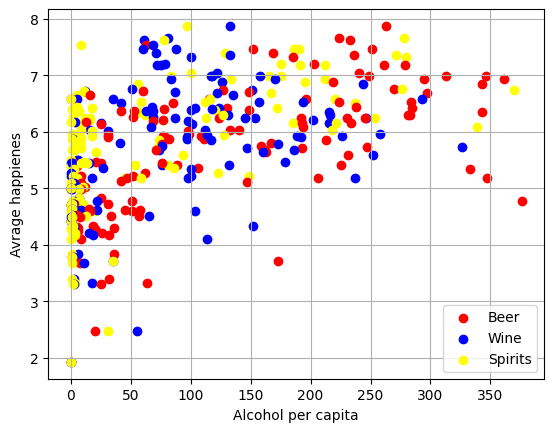

In [6]:
fig = mpl.figure()
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel("Alcohol per capita")
ax.set_ylabel("Avrage happienes")
exceptions = []
for key in contery_dict_alcohol.keys():
    try:
        ax.scatter(contery_dict_alcohol[key][0][1], contery_dict_happienes[key][0][3], color="Red",  label="Beer")
        ax.scatter(contery_dict_alcohol[key][0][2], contery_dict_happienes[key][0][3], color= "Blue", label="Wine")
        ax.scatter(contery_dict_alcohol[key][0][3], contery_dict_happienes[key][0][3], color="Yellow", label="Spirits")
    except:
        exceptions.append(key)
print(exceptions)
ax.legend(labels=["Beer", "Wine","Spirits"])


C:\Users\anton_s0\AppData\Local\Temp\ipykernel_14180\2985844457.py:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('green')
C:\Users\anton_s0\AppData\Local\Temp\ipykernel_14180\2985844457.py:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('blue')


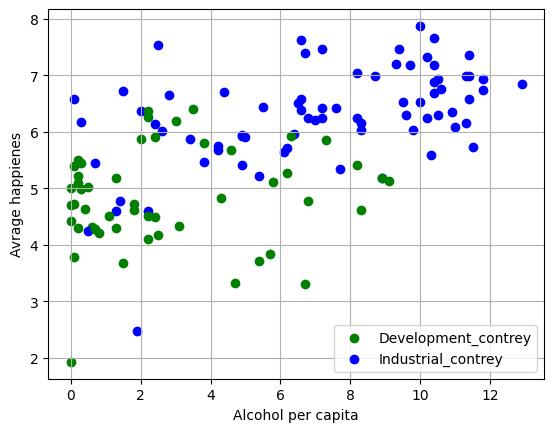

In [10]:
fig = mpl.figure()
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel("Alcohol per capita")
ax.set_ylabel("Avrage happienes")
for key in contery_dict_alcohol.keys():
    try:
        if key in development_contrys:
            ax.scatter(contery_dict_alcohol[key][0][4], contery_dict_happienes[key][0][3], color="Green",  label="Development_contrey")
        if key in industry_contrys:
            ax.scatter(contery_dict_alcohol[key][0][4], contery_dict_happienes[key][0][3], color="Blue", label="Industrial_contrey")
    except:
        pass
ax.legend(["Development_contrey", "Industrial_contrey"])
leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('blue')